In [16]:
!pip install plotly
!pip install cufflinks

In [54]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib import style
import plotly.graph_objects as go
from plotly.subplots import make_subplots
import warnings

%matplotlib inline

In [55]:
plt.rcParams['font.family'] = 'Malgun Gothic'
plt.rcParams['axes.unicode_minus'] = False

In [56]:
SHD = pd.read_csv("0급-기밀파일-1.csv", encoding='cp949')
SHD.head()

,타임스탬프,교복 단어,교복 착용,입는 이유,안 입는 이유,디자인이 별로인 것,교복 필요성,필요 이유,불필요 이유,입기 싫은 요일,...,학과 만족여부,전공 선호도,소셜미디어 사용시간,등교시간,하교시간,하교후 가는 곳,학업 스트레스,친구관계,알바,방과후 여부
0,2023. 10. 26 오후 2:08:13,학생,네,학교에서 입으라고 합니다,불편합니다,바지,필요하다고 생각합니다,늙으면 입을 수 없어서,NaN,화,...,O,5,1시간-2시간,10-30분,18시 이후!,학원 또는 방과후,좋음,나쁨,X,O
1,2023. 10. 26 오후 2:13:04,불편함,아니오,NaN,사복이 편해요,조끼,필요하지 않다고 생각합니다,NaN,입는 목적을 잘 모르겠은,금,...,O,5,2시간-3시간 이상,10-30분,바로 집에 가요!,집,나쁨,좋음,X,O
2,2023. 10. 26 오후 2:15:17,불편함,아니오,NaN,불편합니다,NaN,필요하다고 생각합니다,소외되는 학생이 있을 수 있으니까,NaN,화,...,O,7,1시간-2시간,10-30분,바로 집에 가요!,집,좋음,매우 좋음,X,X
3,2023. 10. 26 오후 2:15:20,셔츠,네,마땅히 입을 옷이 없습니다,NaN,NaN,필요하다고 생각합니다,학생 때만 입을 수 있으니까,NaN,금,...,O,5,0-30분,10-30분,바로 집에 가요!,집,나쁨,매우 좋음,X,X
4,2023. 10. 26 오후 2:15:45,옷안사도돼서개꿀,아니오,NaN,귀찮습니다,마이,필요하다고 생각합니다,"좀 심오하게 가자면, 집안사정이 그리 좋지 않은 아이들은 맨날 같은 옷만 입는 경우...",NaN,금,...,O,5,2시간-3시간 이상,1시간-2시간,18시 이후!,학원 또는 방과후,매우 좋음,매우 좋음,O,X


In [57]:
SHD.isnull().sum()

타임스탬프         158
교복 단어         158
교복 착용         158
입는 이유         190
안 입는 이유       228
디자인이 별로인 것    222
교복 필요성        158
필요 이유         204
불필요 이유        236
입기 싫은 요일      158
사복 착용         158
학년              0
성별              0
학과              0
취미              0
개인공부시간          0
공부 시간대          0
기대연봉            0
학과 만족여부         0
전공 선호도          0
소셜미디어 사용시간      0
등교시간            0
하교시간            0
하교후 가는 곳        0
학업 스트레스         0
친구관계            0
알바              0
방과후 여부          0
dtype: int64

In [58]:
SHD['전공 선호도']

0       5
1       5
2       7
3       5
4       5
       ..
260     9
261     9
262    10
263     7
264     2
Name: 전공 선호도, Length: 265, dtype: int64

([<matplotlib.axis.XTick at 0x201fbb86e60>,
 [Text(0, 0, '2학년'), Text(1, 0, '3학년'), Text(2, 0, '1학년')])

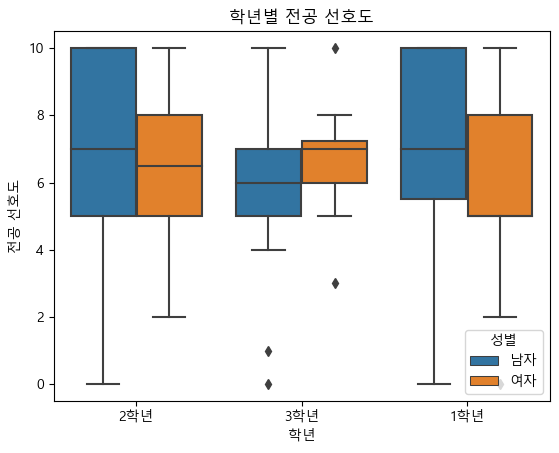

In [59]:
sns.boxplot(data=SHD, x=SHD['학년'],y=SHD['전공 선호도'],hue='성별')
plt.title("학년별 전공 선호도")
plt.xticks([0, 1, 2])

## 학년별 전공 선호도는 평균적으로 1학년이 가장 높다

In [60]:
SHD.describe()

,전공 선호도
count,265.000000
mean,6.596226
std,2.609566
min,0.000000
25%,5.000000
50%,7.000000
75%,9.000000
max,10.000000


In [61]:
SHD["성별"].value_counts()

남자    177
여자     88
Name: 성별, dtype: int64

In [62]:
male = SHD[SHD['성별']=="남자"].sample(n = 88)

In [63]:
female = SHD[SHD['성별']=='여자']

In [64]:
hong =  pd.concat([male,female])

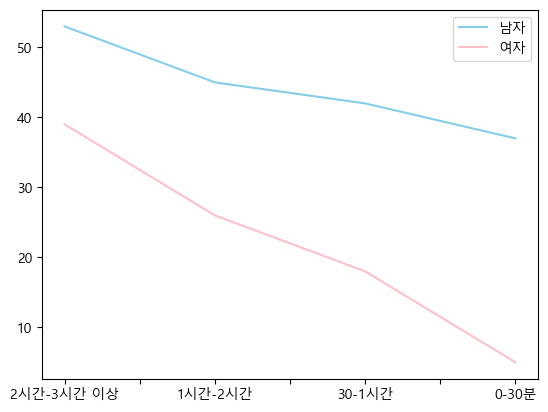

In [65]:
SHD[SHD['성별']=='남자']['소셜미디어 사용시간'].value_counts().plot(kind='line',color='skyblue',label='남자')
SHD[SHD['성별']=='여자']['소셜미디어 사용시간'].value_counts().plot(kind='line',color='pink',label='여자')
plt.legend()
plt.show()

## 

In [66]:
hobbyMale = male["취미"]
hobbyFemale = female["취미"]
hobbyMale = pd.DataFrame(hobbyMale.value_counts())
hobbyFemale = pd.DataFrame(hobbyFemale.value_counts())
hobbyMale['index'] = hobbyMale.index
hobbyFemale['index'] = hobbyFemale.index
hobbyMale.index = [x for x in range(0,6)]
hobbyFemale.index = [x for x in range(0,6)]
print(hobbyMale)
print(hobbyFemale)

   취미 index
0  39    게임
1  18    운동
2  11    기타
3   9    음악
4   8  영상시청
5   3    예술
   취미 index
0  24    음악
1  15    기타
2  14  영상시청
3  13    운동
4  11    게임
5  11    예술


In [67]:
boxing = make_subplots(rows=1, cols=2, specs=[[{'type':'domain'},{'type':'domain'}]])
boxing.add_trace(go.Pie(labels = hobbyMale['index'],
    values = hobbyMale['취미']),1,1)
boxing.add_trace(go.Pie(labels = hobbyFemale['index'],
    values = hobbyFemale['취미']),1,2)
boxing.update_traces(hole=.4, hoverinfo="label+percent+name")
boxing.update_layout(
                title_text="남녀 취미 분석",
                title_x=0.5, font = dict(size=10),
                annotations=[dict(text='남자', x=0.16, y=0.5, font_size=25, showarrow=False),
                            dict(text="여자", x=0.84, y=0.5, font_size=25, showarrow=False)]
)
boxing.show()

In [68]:
SHD['학년'].value_counts()
two = SHD[SHD["학년"]=="2학년"].sample(n=29)
three = SHD[SHD["학년"]=="3학년"].sample(n=29)
one = SHD[SHD['학년']=='1학년']

In [69]:
hong2 = pd.concat([two,three])

In [70]:
stressClass1 = one["학업 스트레스"]
stressClass2 = two["학업 스트레스"]
stressClass3 = three["학업 스트레스"]
stressClass1 = pd.DataFrame(stressClass1.value_counts())
stressClass2 = pd.DataFrame(stressClass2.value_counts())
stressClass3 = pd.DataFrame(stressClass3.value_counts())
stressClass1['index'] = stressClass1.index
stressClass2['index'] = stressClass2.index
stressClass3['index'] = stressClass3.index
stressClass1.index = [x for x in range(0,4)]
stressClass2.index = [x for x in range(0,4)]
stressClass3.index = [x for x in range(0,4)]
print(stressClass1)
print(stressClass2)
print(stressClass3)

   학업 스트레스  index
0       52     좋음
1       40     나쁨
2       24  매우 나쁨
3       13  매우 좋음
   학업 스트레스  index
0        9     나쁨
1        9  매우 좋음
2        8     좋음
3        3  매우 나쁨
   학업 스트레스  index
0       10     좋음
1        9     나쁨
2        6  매우 나쁨
3        4  매우 좋음


In [71]:
boxing2 = make_subplots(rows=1, cols=3, specs=[[{'type':'domain'},{'type':'domain'},{'type':'domain'}]])
boxing2.add_trace(go.Pie(labels = stressClass1['index'],
    values = stressClass1['학업 스트레스']),1,1)
boxing2.add_trace(go.Pie(labels = stressClass2['index'],
    values = stressClass2['학업 스트레스']),1,2)
boxing2.add_trace(go.Pie(labels = stressClass3['index'],
    values = stressClass3['학업 스트레스']),1,3)
boxing2.update_traces(hole=.4, hoverinfo="label+percent+name")
boxing2.update_layout(
                title_text="학년 별 학업 스트레스 분석",
                title_x=0.5, font = dict(size=10),
                annotations=[dict(text='1학년', x=0.11, y=0.5, font_size=15, showarrow=False),
                            dict(text="2학년", x=0.5, y=0.5, font_size=15, showarrow=False),
                            dict(text="3학년", x=0.88, y=0.5, font_size=15, showarrow=False)]
)
boxing2.show()

# 스토리를 만들어라!

# 마크다운으로 결론을 달아라

In [72]:
!pip install wordcloud

In [73]:
from wordcloud import WordCloud
from string import digits
import re

In [89]:
font_path = 'C:/Windows/Fonts/malgun.ttf'

In [91]:
import matplotlib.pyplot as plt
from string import digits
from PIL import Image
import numpy as np

# 이미지는 수학 배열(행렬)이다.

In [ ]:
wc = WordCloud(font_path=font_path, background_color='white', mask = mask_arr, prefer_horizontal = True, width=600, height=400)
wc.generate(text)
plt.figure(figsize=(6,6))
plt.imshow(wc)
plt.title("Word Frequency", size= 13)
plt.axis("off")
plt.show

In [80]:
SKD = pd.read_csv("data/0급-기밀파일.csv", encoding="cp949")
SKD.head()

,타임스탬프,교복 단어,성별,학년,교복 착용,입는 이유,안 입는 이유,디자인이 별로인 것,교복 필요성,필요 이유,불필요 이유,입기 싫은 요일,사복 착용
0,2023. 10. 26 오후 2:08:13,학생,남,2학년,네,학교에서 입으라고 합니다,불편합니다,바지,필요하다고 생각합니다,늙으면 입을 수 없어서,NaN,화,아니오
1,2023. 10. 26 오후 2:13:04,불편함,남,3학년,아니오,NaN,사복이 편해요,조끼,필요하지 않다고 생각합니다,NaN,입는 목적을 잘 모르겠은,금,네
2,2023. 10. 26 오후 2:15:17,불편함,남,3학년,아니오,NaN,불편합니다,NaN,필요하다고 생각합니다,소외되는 학생이 있을 수 있으니까,NaN,화,네
3,2023. 10. 26 오후 2:15:20,셔츠,남,3학년,네,마땅히 입을 옷이 없습니다,NaN,NaN,필요하다고 생각합니다,학생 때만 입을 수 있으니까,NaN,금,네
4,2023. 10. 26 오후 2:15:45,옷안사도돼서개꿀,남,3학년,아니오,NaN,귀찮습니다,마이,필요하다고 생각합니다,"좀 심오하게 가자면, 집안사정이 그리 좋지 않은 아이들은 맨날 같은 옷만 입는 경우...",NaN,금,네


In [94]:
text2=""

In [95]:
with open("필요이유.txt", "r", encoding="utf-8")as f:
        lines2 = f.readlines()
        for line2 in lines2:
            text2 += line2.replace('수', '')


        text2 = re.sub(r'[0-9]+', '', text2)
        print(text2)

늙으면 입을  없어서

소외되는 학생이 있을  있으니까
학생 때만 입을  있으니까
좀 심오하게 가자면, 집안사정이 그리 좋지 않은 아이들은 맨날 같은 옷만 입는 경우가 생길  있겠죠. 이런 아이들에겐 주변 친구들 눈치도 안보이고 교복이 오히려 좋을 거 같아서요.
질서 유지
필요는 하겠지만 (여러 행사에 의해) 어느 정도 자유를 둬도 괜찮다고 생각한다.
어른이 되어서는 입을  없으니까
학생의 신분이기 때문에
학생들간의 가정환경(부모님재력)을 함부로 판단하지 않아도 되고, 학생때만 누릴있는 특혜라고 생각하기 때문에

학교를 다니는 학생이니까
모든 같은 옷을 입고있기때문에 옷에대한 걱정이 필요없지고 학생이라는것을 알  있기 때문에
걍

학생


학교에 갈때는 교복이 디폴트라고 생각합니다





만약 필요하다면 각 학교간 학생 구별을 위해 필요하다 생각됩니다
학생과 외부인 구분
학교를 다녀서
없어진다면 당장은 좋을지 몰라도 지금 사회에 부작용이 나타날것 같아서.


학생의 신분을 가장 잘 나태낼  있는것이 교복이라고 생각합니다.
학교에 교복이 필요한게 이유가 있을까요


학생이니까
학생이라서





구분을 위해
학생과 성인을 구분하기 위해서
학교의 상징성


교복을 입지 않으면 우리학교 학생인지 아닌지 모르니까 필요하다 생각합니다

타학교 학생들과 구분하기 쉬워야함

대충 입기 좋다.
있어서 나쁠건 없기 때문
학생들을 알아 볼  있기 때문에
그래도..고등학교만의 묘미니까 뭐...
그래야지 학생과 외부인을 분리할있기때문이다


그냥
학생이라고 구분하기 쉬워지기 때문에





학교에서 입어야 하는 의상이라서


상징


없어서 손해볼 건 있는데 있어서 손해볼 건 없어서
그 학교의 학생이라는 신분 같은 느낌과 소속감을 위해

학생 신분임을 뿜뿜 자랑하기 위해.
학생의 신분을 알게 해주니까요
신분을 알 가 없어서 입니다
학생과 외부인 구분
통일성을 위하여

학교 소속을 나타내고 학생 신분을 사회에 보이는거기 때문에 필요하다고 생각합니다.

학생이라는 것을 알리기 위해서

In [96]:
font_path = 'C:/Windows/Fonts/malgun.ttf'
wc2 = WordCloud(font_path=font_path, background_color="white", width=600, height=400)
wc2.generate(text2)
wc2.to_file("result_review.png")

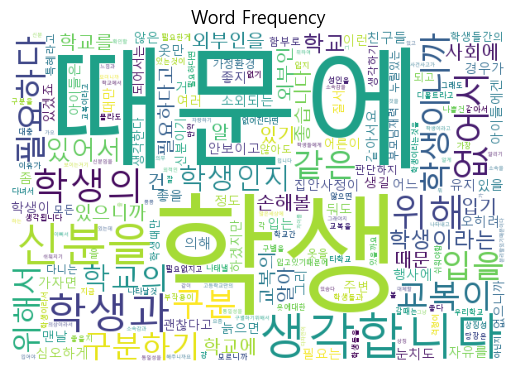

In [101]:
plt.imshow(wc2)
plt.title("Word Frequency", size = 13)
plt.axis('off')
plt.show()

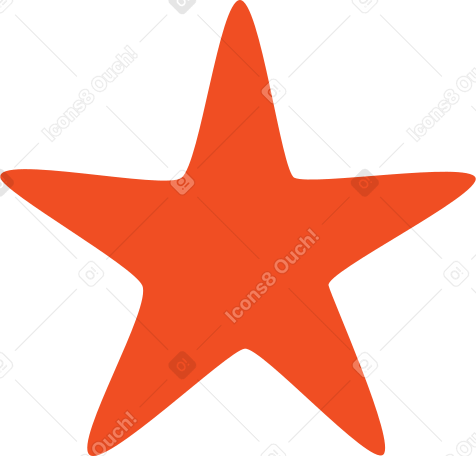

In [105]:
im2 = Image.open('왕관.png')
mask_arr2 = np.array(im2)
im2

<function matplotlib.pyplot.show(close=None, block=None)>

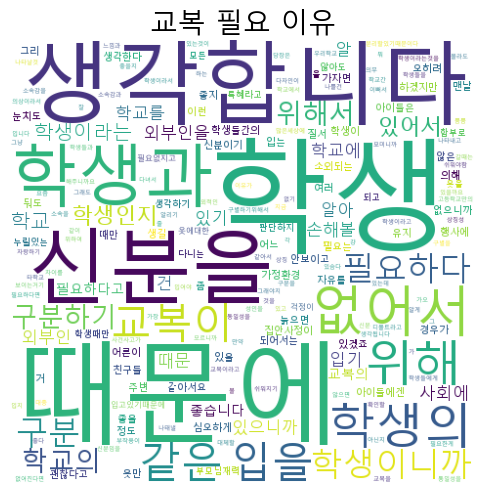

In [108]:
wc2 = WordCloud(font_path=font_path, background_color='white', mask = mask_arr2, prefer_horizontal = True, width=600, height=400)
wc2.generate(text2)
plt.figure(figsize=(6,6))
plt.imshow(wc2)
plt.title("교복 필요 이유", size= 20)
plt.axis("off")
plt.show

In [109]:
text3=""

In [42]:
with open("불필요 이유.txt", "r", encoding="utf-8")as f:
        lines3 = f.readlines()
        for line3 in lines3:
            text3 += line3.replace('수', '')


        text3 = re.sub(r'[0-9]+', '', text3)
        print(text3)

FileNotFoundError: [Errno 2] No such file or directory: '불필요 이유.txt'

In [ ]:
wc3 = WordCloud(font_path=font_path, background_color="white", width=600, height=400)
wc3.generate(text3)
wc3.to_file("result_review.png")

In [ ]:
plt.imshow(wc3)
plt.title("Word Frequency", size = 13)
plt.axis('off')
plt.show()

In [ ]:
im3 = Image.open('왕관.png')
mask_arr3 = np.array(im3)
im3

In [ ]:
wc3 = WordCloud(font_path=font_path, background_color='white', mask = mask_arr, prefer_horizontal = True, width=600, height=400)
wc3.generate(text3)
plt.figure(figsize=(6,6))
plt.imshow(wc3)
plt.title("교복 불필요 이유", size= 20)
plt.axis("off")
plt.show

In [ ]:
one2 = SKD[SKD['학년']=='1학년']
two2 = SKD[SKD["학년"]=="2학년"]
three2 = SKD[SKD["학년"]=="3학년"]

In [ ]:
young = pd.concat([one2,two2,three2])
young

In [ ]:
neceClass1 = one2["교복 필요성"]
neceClass2 = two2["교복 필요성"]
neceClass3 = three2["교복 필요성"]
neceClass1 = pd.DataFrame(neceClass1.value_counts())
neceClass2 = pd.DataFrame(neceClass2.value_counts())
neceClass3 = pd.DataFrame(neceClass3.value_counts())
neceClass1['index'] = neceClass1.index
neceClass2['index'] = neceClass2.index
neceClass3['index'] = neceClass3.index
neceClass1.index = [x for x in range(0,2)]
neceClass2.index = [x for x in range(0,2)]
neceClass3.index = [x for x in range(0,2)]
print(neceClass1)
print(neceClass2)
print(neceClass3)

In [ ]:
boxing3 = make_subplots(rows=1, cols=3, specs=[[{'type':'domain'},{'type':'domain'},{'type':'domain'}]])
boxing3.add_trace(go.Pie(labels = neceClass1['index'],
    values = neceClass1['교복 필요성']),1,1)
boxing3.add_trace(go.Pie(labels = neceClass2['index'],
    values = neceClass2['교복 필요성']),1,2)
boxing3.add_trace(go.Pie(labels = neceClass3['index'],
    values = neceClass3['교복 필요성']),1,3)
boxing3.update_traces(hole=.4, hoverinfo="label+percent+name")
boxing3.update_layout(
                title_text="학년별 교복 필요성",
                title_x=0.5, font = dict(size=10),
                annotations=[dict(text='1학년', x=0.1, y=0.5, font_size=10, showarrow=False),
                            dict(text="2학년", x=0.5, y=0.5, font_size=10, showarrow=False),
                            dict(text="3학년", x=0.9, y=0.3, font_size=10, showarrow=False)]
)
boxing3.show()

In [5]:
sns.countplot(data=SKD, x='교복 필요성',hue='학년')

NameError: name 'SKD' is not defined

In [6]:
sns

<module 'seaborn' from 'C:\\Users\\user\\anaconda3\\lib\\site-packages\\seaborn\\__init__.py'>